# Indian startups analysis

The datasets containing information on indian startups' funding, including the startup's details, the funding it received, and the investors' information. 

The following three datasets includes data from 2019, 2020 and 2021: 

- `startup_funding2019.csv`
- `startup_funding2020.csv`
- `startup_funding2021.csv`

At [this link](https://www.kaggle.com/datasets/omkargowda/indian-startups-funding-data?select=startup_funding2019.csv) is the source of the original data (Kaggle) as well as more information on its composition *(note: the files in the data folder are slightly different from the originals)*.

In [2]:
# import the necessary libraries

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import requests

In [3]:
# define a list of the years
years = ['2019', '2020', '2021']

# create the fnd DataFrame 
fnd = pd.DataFrame([])

# load all three file.csv in fnd DataFrame
for year in years:
    csv_path = "..\startup_funding" + year + ".csv"
    df_tmp = pd.read_csv(csv_path)
    df_tmp['year'] = year
    fnd = pd.concat([fnd, df_tmp], ignore_index = True)


In [4]:
# check the shape of the fnd DataFrame (2343,10)
print(f"The shape of the fnd DataFrame is {fnd.shape}")

The shape of the fnd DataFrame is (2343, 10)


In [5]:
# check if the fnd DataFrame contains all of the years
fnd['year'].unique()

array(['2019', '2020', '2021'], dtype=object)

In [6]:
# check the columns data types
fnd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2343 non-null   object
 1   Founded        2102 non-null   object
 2   HeadQuarter    2228 non-null   object
 3   Sector         2325 non-null   object
 4   What it does   2343 non-null   object
 5   Founders       2324 non-null   object
 6   Investor       2243 non-null   object
 7   Amount($)      2211 non-null   object
 8   Stage          1220 non-null   object
 9   year           2343 non-null   object
dtypes: object(10)
memory usage: 183.2+ KB


In [7]:
# check the unique values contained in the 'Founded' column
fnd['Founded'].unique()

array([nan, 2014.0, 2004.0, 2013.0, 2010.0, 2018.0, 2019.0, 2017.0,
       2011.0, 2015.0, 2016.0, 2012.0, 2008.0, '2019', '2018', '2020',
       '2016', '2008', '2015', '2017', '2014', '1998', '2007', '2011',
       '1982', '2013', '2009', '2012', '1995', '2010', '2006', '1978',
       '1999', '1994', '2005', '1973', '-', '2002', '2004', '2001', 2021,
       2020, 1993, 1999, 1989, 2009, 2002, 1994, 2006, 2000, 2007, 1978,
       2003, 1998, 1991, 1984, 2005, 1963], dtype=object)

In [8]:
# replace the '-' and Nan value with 0 in the 'Founded' column
fnd.loc[fnd['Founded'] == '-','Founded'] = 0
fnd['Founded'].fillna(0, inplace=True)

In [9]:
# recheck the unique values contained in the 'Founded' column
fnd['Founded'].unique()

array([0, 2014.0, 2004.0, 2013.0, 2010.0, 2018.0, 2019.0, 2017.0, 2011.0,
       2015.0, 2016.0, 2012.0, 2008.0, '2019', '2018', '2020', '2016',
       '2008', '2015', '2017', '2014', '1998', '2007', '2011', '1982',
       '2013', '2009', '2012', '1995', '2010', '2006', '1978', '1999',
       '1994', '2005', '1973', '2002', '2004', '2001', 2021, 2020, 1993,
       1999, 1989, 2009, 2002, 1994, 2006, 2000, 2007, 1978, 2003, 1998,
       1991, 1984, 2005, 1963], dtype=object)

In [10]:
# convert the values in the 'Founded' column to numeric type 'integer'
fnd['Founded'] = pd.to_numeric(fnd['Founded'], downcast='integer')

In [11]:
# check the unique values contained in the 'Amount($)' column
fnd['Amount($)'].unique()

array(['$6,300,000', '$150,000,000', '$28,000,000', '$30,000,000',
       '$6,000,000', 'Undisclosed', '$1,000,000', '$20,000,000',
       '$275,000,000', '$22,000,000', '$5,000,000', '$140,500',
       '$540,000,000', '$15,000,000', '$182,700', '$12,000,000',
       '$11,000,000', '$15,500,000', '$1,500,000', '$5,500,000',
       '$2,500,000', '$140,000', '$230,000,000', '$49,400,000',
       '$32,000,000', '$26,000,000', '$150,000', '$400,000', '$2,000,000',
       '$100,000,000', '$8,000,000', '$100,000', '$50,000,000',
       '$120,000,000', '$4,000,000', '$6,800,000', '$36,000,000',
       '$5,700,000', '$25,000,000', '$600,000', '$70,000,000',
       '$60,000,000', '$220,000', '$2,800,000', '$2,100,000',
       '$7,000,000', '$311,000,000', '$4,800,000', '$693,000,000',
       '$33,000,000', '$200,000', '$340,000', '$45,000,000', '$1,200,000',
       '$660,000,000', '$120,000', '$7,500,000', '$500,000', '$3,000,000',
       '$10,000,000', '$145,000,000', '$21,000,000', '$560,000'

In [12]:
# remove ',' and '$' characters from the 'Amount($)' column
fnd['Amount($)'] = fnd['Amount($)'].str.replace(',','').str.replace('$','')

# replace the Nan value with 0 in the 'Founded' column
fnd['Founded'].fillna(0, inplace=True)

# convert the values in the 'Amount($)' column to numeric type 'float'
fnd['Amount($)'] = pd.to_numeric(fnd['Amount($)'], errors='coerce', downcast='float')

C:\Users\crist\AppData\Local\Temp\ipykernel_12064\3502940427.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  fnd['Amount($)'] = fnd['Amount($)'].str.replace(',','').str.replace('$','')


In [13]:
# convert the values in the 'year' column to numeric
fnd['year'] = pd.to_numeric(fnd['year'], errors='coerce', downcast='integer')

In [14]:
# check the new columns data types
fnd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2343 non-null   object 
 1   Founded        2343 non-null   int16  
 2   HeadQuarter    2228 non-null   object 
 3   Sector         2325 non-null   object 
 4   What it does   2343 non-null   object 
 5   Founders       2324 non-null   object 
 6   Investor       2243 non-null   object 
 7   Amount($)      1842 non-null   float64
 8   Stage          1220 non-null   object 
 9   year           2343 non-null   int16  
dtypes: float64(1), int16(2), object(7)
memory usage: 155.7+ KB


In [15]:
print (f"The total amount of funding given in the three years is: {(fnd['Amount($)'].sum() / 1000000).round(2)} $MM (millions of dollars)")

The total amount of funding given in the three years is: 271544.63 $MM (millions of dollars)


In [16]:
fnd.groupby('Investor', as_index=False).size().sort_values('size', ascending=False).head(1)

,Investor,size
696,Inflection Point Ventures,36


In [17]:
# create a DataFrame with records related to the year 2020
fnd_2020 = fnd.loc[fnd['year'] == 2020]

In [18]:
# Create a new DataFrame containing the requested ranking, where the index represents the rank position
fnd_2020_rank = fnd_2020.groupby('Investor', as_index=False).size().sort_values('size', ascending = False)
fnd_2020_rank.reset_index(inplace=True, drop=True)
fnd_2020_rank

,Investor,size
0,Venture Catalysts,20
1,Mumbai Angels Network,12
2,Angel investors,12
3,Inflection Point Ventures,11
4,Undisclosed,10
...,...,...
843,Homage Ventures.,1
844,HostelFund,1
845,Huddle Accelerator,1
846,"Hummingbird Ventures, Bedrock Capital",1


In [19]:
# calculate the position of Inflection Point Ventures and save it as a new variable 'Rank'
rank = fnd_2020_rank[fnd_2020_rank['Investor'] == 'Inflection Point Ventures'].index[0] + 1

In [20]:
print(f"Inflection Point Ventures is in position number {rank} in the ranking of the highest number `Company/Brand`s founded in 2020")

Inflection Point Ventures is in position number 4 in the ranking of the highest number `Company/Brand`s founded in 2020


In [21]:
# load the .csv file to a DataFrame named sps
sps =pd.read_csv('C:\\Users\\crist\\OneDrive\\Desktop\\Boolean Data School\\Boolean Assignment\\2.6.x _ Final Assignment\\data\\Software Professionals Salary.csv')
sps.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android


In [22]:
# create a new DF called `sps_loc` where you group by `Location` and show, for each city in the dataset, the average `Rating` and `Salary`
sps_loc = sps.groupby('Location', as_index=False)[['Rating', 'Salary']].mean()
sps_loc

,Location,Rating,Salary
0,Bangalore,3.920232,735344.739593
1,Chennai,3.902726,584559.661513
2,Hyderabad,3.914484,679099.157376
3,Jaipur,3.940741,629135.802469
4,Kerala,3.885185,553577.481481
5,Kolkata,4.024719,710925.573034
6,Madhya Pradesh,3.992258,677641.909677
7,Mumbai,3.881709,961180.368491
8,New Delhi,3.943415,658756.735632
9,Pune,3.886082,690476.311153


In [24]:
# create a new DF called `fnd_loc` where you group by `HeadQuarter` 
# and show, for each city in the dataset **for the year 2021**, the total number of 'Company/Brand' funded and the total `Amount($)` invested
fnd_loc = fnd.loc[fnd['year'] == 2021]

fnd_loc_size = fnd_loc.groupby('HeadQuarter', as_index=False)['Company/Brand'].size()
fnd_loc_sum = fnd_loc.groupby('HeadQuarter', as_index= False)['Amount($)'].sum()

fnd_loc = fnd_loc_size.merge(fnd_loc_sum, how='inner', on='HeadQuarter')
fnd_loc = fnd_loc.rename(columns={'size':'TotCompaniesFunded',
                                 'Amount($)' : 'TotAmount($)'})
fnd_loc

,HeadQuarter,TotCompaniesFunded,TotAmount($)
0,Ahmadabad,6,4.300000e+06
1,Ahmedabad,11,1.981550e+08
2,Ambernath,1,0.000000e+00
3,Andheri,1,0.000000e+00
4,Bangalore,425,1.432742e+10
...,...,...,...
64,The Nilgiris,1,2.000000e+05
65,Thiruvananthapuram,1,0.000000e+00
66,Trivandrum,1,3.000000e+05
67,Vadodara,1,1.000000e+07


In [25]:
# merge the two DataFrames you just created so to **keep just the cities that are in both datasets** and save the results in a third DataFrame called `sps_fnd_loc` 
sps_fnd_loc = fnd_loc.merge(sps_loc, how='inner', left_on='HeadQuarter', right_on='Location')
sps_fnd_loc

,HeadQuarter,TotCompaniesFunded,TotAmount($),Location,Rating,Salary
0,Bangalore,425,1.432742e+10,Bangalore,3.920232,735344.739593
1,Chennai,40,7.171400e+08,Chennai,3.902726,584559.661513
2,Hyderabad,34,2.439600e+08,Hyderabad,3.914484,679099.157376
3,Jaipur,11,3.433000e+08,Jaipur,3.940741,629135.802469
4,Kolkata,5,2.800000e+07,Kolkata,4.024719,710925.573034
5,Mumbai,200,1.538303e+11,Mumbai,3.881709,961180.368491
6,New Delhi,143,1.673010e+09,New Delhi,3.943415,658756.735632
7,Pune,46,5.090700e+08,Pune,3.886082,690476.311153


In [26]:
# using the `sps_fnd_loc` DataFrame delete the `HeadQuarter` column
sps_fnd_loc.drop('HeadQuarter', axis=1, inplace=True)
sps_fnd_loc

,TotCompaniesFunded,TotAmount($),Location,Rating,Salary
0,425,1.432742e+10,Bangalore,3.920232,735344.739593
1,40,7.171400e+08,Chennai,3.902726,584559.661513
2,34,2.439600e+08,Hyderabad,3.914484,679099.157376
3,11,3.433000e+08,Jaipur,3.940741,629135.802469
4,5,2.800000e+07,Kolkata,4.024719,710925.573034
5,200,1.538303e+11,Mumbai,3.881709,961180.368491
6,143,1.673010e+09,New Delhi,3.943415,658756.735632
7,46,5.090700e+08,Pune,3.886082,690476.311153


In [27]:
# using the `sps_fnd_loc` DataFrame create a new column `Amount($MM)` that is equal to `Amount($)` divided by 1,000,000
sps_fnd_loc['Amount($MM)'] = sps_fnd_loc['TotAmount($)'] / 1000000
sps_fnd_loc

,TotCompaniesFunded,TotAmount($),Location,Rating,Salary,Amount($MM)
0,425,1.432742e+10,Bangalore,3.920232,735344.739593,14327.42
1,40,7.171400e+08,Chennai,3.902726,584559.661513,717.14
2,34,2.439600e+08,Hyderabad,3.914484,679099.157376,243.96
3,11,3.433000e+08,Jaipur,3.940741,629135.802469,343.30
4,5,2.800000e+07,Kolkata,4.024719,710925.573034,28.00
5,200,1.538303e+11,Mumbai,3.881709,961180.368491,153830.30
6,143,1.673010e+09,New Delhi,3.943415,658756.735632,1673.01
7,46,5.090700e+08,Pune,3.886082,690476.311153,509.07


In [28]:
# using the `sps_fnd_loc` DataFrame delete the `Amount($)` column
sps_fnd_loc.drop('TotAmount($)', axis=1, inplace=True)
sps_fnd_loc

,TotCompaniesFunded,Location,Rating,Salary,Amount($MM)
0,425,Bangalore,3.920232,735344.739593,14327.42
1,40,Chennai,3.902726,584559.661513,717.14
2,34,Hyderabad,3.914484,679099.157376,243.96
3,11,Jaipur,3.940741,629135.802469,343.30
4,5,Kolkata,4.024719,710925.573034,28.00
5,200,Mumbai,3.881709,961180.368491,153830.30
6,143,New Delhi,3.943415,658756.735632,1673.01
7,46,Pune,3.886082,690476.311153,509.07


In [29]:
# using the `sps_fnd_loc` DataFrame rename all the columns to the following names: `['City', 'Avg. Rating', 'Avg. Salary', 'Nr. Companies Funded', 'Sum Funding ($MM)']`
sps_fnd_loc = sps_fnd_loc.rename(columns = {'Location':'City',
                                            'Rating' : 'Avg. Rating',
                                            'Salary' : 'Avg. Salary',
                                            'TotCompaniesFunded' : 'Nr. Companies Funded',
                                            'Amount($MM)' : 'Sum Funding ($MM)',
                                           })
sps_fnd_loc = sps_fnd_loc[['City', 'Avg. Rating', 'Avg. Salary', 'Nr. Companies Funded', 'Sum Funding ($MM)']]
sps_fnd_loc

,City,Avg. Rating,Avg. Salary,Nr. Companies Funded,Sum Funding ($MM)
0,Bangalore,3.920232,735344.739593,425,14327.42
1,Chennai,3.902726,584559.661513,40,717.14
2,Hyderabad,3.914484,679099.157376,34,243.96
3,Jaipur,3.940741,629135.802469,11,343.30
4,Kolkata,4.024719,710925.573034,5,28.00
5,Mumbai,3.881709,961180.368491,200,153830.30
6,New Delhi,3.943415,658756.735632,143,1673.01
7,Pune,3.886082,690476.311153,46,509.07


In [30]:
# look at the `City` that received the **highest** `Avg. Rating` score by employees: what is the `Nr. Companies Funded` in that city? (Kolkata, 16)
sps_fnd_loc.sort_values(by='Avg. Rating', ascending=False, inplace=True)
sps_fnd_loc.reset_index(drop=True, inplace=True)
print(f"The city that received the highest 'Avg. Rating' score by employees is {sps_fnd_loc['City'].iloc[0]}, where {sps_fnd_loc['Nr. Companies Funded'].iloc[0]} companies have been funded")

The city that received the highest 'Avg. Rating' score by employees is Kolkata, where 5 companies have been funded


Text(0.5, 1.0, 'Relationship between Avg Salary and Sum Funding($MM)')

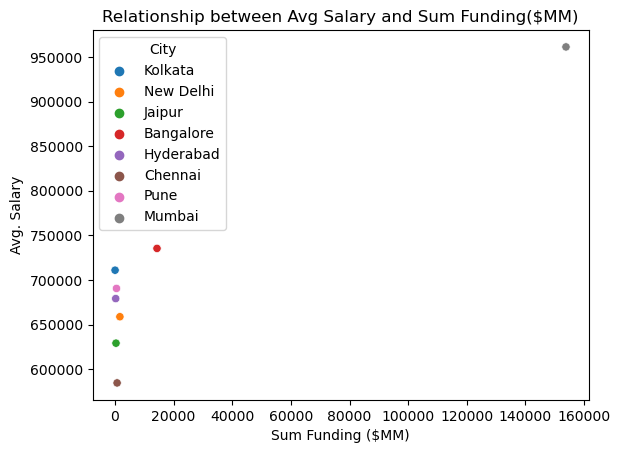

In [31]:
# Which `City` stands out in terms of total funding received by companies and salary paid to their employees? (Mumbai)
sns.scatterplot(x='Sum Funding ($MM)', y='Avg. Salary', data=sps_fnd_loc, hue='City')
plt.title('Relationship between Avg Salary and Sum Funding($MM)')

In [32]:
# save the url
url = "https://www.census2011.co.in/city.php"

# make HTTP request to get datas
r = requests.get(url)

# check requests status 
print(r.status_code)

200


In [33]:
# save the html text in variable r as a new variable called html_content
html_content= r.text

In [34]:
# save the html_content as a list
page = pd.read_html(html_content)
page

[       #        City           State  Population  Metropolitan  Sexratio  \
 0      1      Mumbai     Maharashtra    12442373      18414288       853   
 1      2       Delhi           Delhi    11034555      16314838       876   
 2      3   Bangalore       Karnataka     8443675       8499399       923   
 3      4   Hyderabad  Andhra Pradesh     6731790       7749334       955   
 4      5   Ahmedabad         Gujarat     5577940       6352254       898   
 ..   ...         ...             ...         ...           ...       ...   
 493  494     Gangtok          Sikkim      100286        100286       912   
 494  495       Datia  Madhya Pradesh      100284        100284       900   
 495  496       Nagda  Madhya Pradesh      100039        100039       947   
 496  497    Banswara       Rajasthan       99969        101177       960   
 497  498  Kapurthala          Punjab       98916         98916       839   
 
      Literacy  
 0       89.73  
 1       87.59  
 2       88.71  
 3    

In [35]:
# convert the list to a Pandas DataFrame 
cities = pd.DataFrame(page[0])

# drop the column '#' because is the old index
cities.drop(columns='#', inplace=True)

# show the shape and the first 5 rows of census2011 DataFrame
print(cities.shape)
cities.head(5)

(498, 6)


,City,State,Population,Metropolitan,Sexratio,Literacy
0,Mumbai,Maharashtra,12442373,18414288,853,89.73
1,Delhi,Delhi,11034555,16314838,876,87.59
2,Bangalore,Karnataka,8443675,8499399,923,88.71
3,Hyderabad,Andhra Pradesh,6731790,7749334,955,83.26
4,Ahmedabad,Gujarat,5577940,6352254,898,88.29


In [36]:
# verify the type of datas
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          498 non-null    object 
 1   State         498 non-null    object 
 2   Population    498 non-null    int64  
 3   Metropolitan  498 non-null    int64  
 4   Sexratio      498 non-null    int64  
 5   Literacy      498 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 23.5+ KB


In [37]:
# Which City has the highest levels of `Literacy` in the country? (Aizawl)
cities.sort_values(by='Literacy', ascending=False).head(1)

,City,State,Population,Metropolitan,Sexratio,Literacy
150,Aizawl,Mizoram,293416,293416,1025,98.36


In [38]:
# verify if the City columns has duplicate values before use it as a Primary Key in a Left Join Merge
cities['City'].nunique()

497

In [39]:
# show which is the duplicate City
cities['City'].value_counts(ascending=False)

Aurangabad              2
Bhuj                    1
Chhindwara              1
Kolar                   1
Dibrugarh               1
                       ..
Maunath Bhanjan         1
Satna                   1
Purnia                  1
Kirari Suleman Nagar    1
Kapurthala              1
Name: City, Length: 497, dtype: int64

In [40]:
# show the row datas of the duplicate City
cities.loc[cities.City == 'Aurangabad']

,City,State,Population,Metropolitan,Sexratio,Literacy
31,Aurangabad,Maharashtra,1175116,1189376,929,87.49
485,Aurangabad,Bihar,102244,102244,910,86.03


In [41]:
# fix the duplicate datas 
cities.iloc[31, 0] = 'Aurangabad (Maharashtra)'
cities.iloc[485, 0] = 'Aurangabad (Bihar)'

In [158]:
# I noticed that in the sps_fnd_loc DF, the city of New Delhi is present, which is not found in the cities DF. 
# In cities DF, the observation is recorded as Delhi. This discrepancy arises from the fact that New Delhi is a district of the city of Delhi (see more: https://en.wikipedia.org/wiki/New_Delhi)
# To fix the issue, I will replace New Delhi with Delhi in the DF sps_fnd_loc.

# Find the index of New Delhi raw
sps_fnd_loc.loc[sps_fnd_loc['City'] == 'New Delhi']

,City,Avg. Rating,Avg. Salary,Nr. Companies Funded,Sum Funding ($MM)
1,New Delhi,3.943415,658756.735632,180,2568.642


In [159]:
# fix the issue
sps_fnd_loc.iloc[1,0] = 'Delhi'

In [161]:
# merge cities DataFrame with sps_fnd_loc DataFrame
sps_fnd_loc_lit = cities.merge(sps_fnd_loc, how='inner', left_on='City', right_on='City')
print(sps_fnd_loc_lit.shape)
sps_fnd_loc_lit

(8, 10)


,City,State,Population,Metropolitan,Sexratio,Literacy,Avg. Rating,Avg. Salary,Nr. Companies Funded,Sum Funding ($MM)
0,Mumbai,Maharashtra,12442373,18414288,853,89.73,3.881709,961180.368491,376,229347.049542
1,Delhi,Delhi,11034555,16314838,876,87.59,3.943415,658756.735632,180,2568.642000
2,Bangalore,Karnataka,8443675,8499399,923,88.71,3.920232,735344.739593,765,20329.169358
3,Hyderabad,Andhra Pradesh,6731790,7749334,955,83.26,3.914484,679099.157376,61,423.781000
4,Chennai,Tamil Nadu,4646732,8696010,989,90.18,3.902726,584559.661513,87,1013.128146
5,Kolkata,West Bengal,4496694,14112536,908,86.31,4.024719,710925.573034,16,56.366500
6,Pune,Maharashtra,3124458,5049968,948,89.56,3.886082,690476.311153,84,1356.044000
7,Jaipur,Rajasthan,3046163,3046163,900,83.33,3.940741,629135.802469,22,499.100000


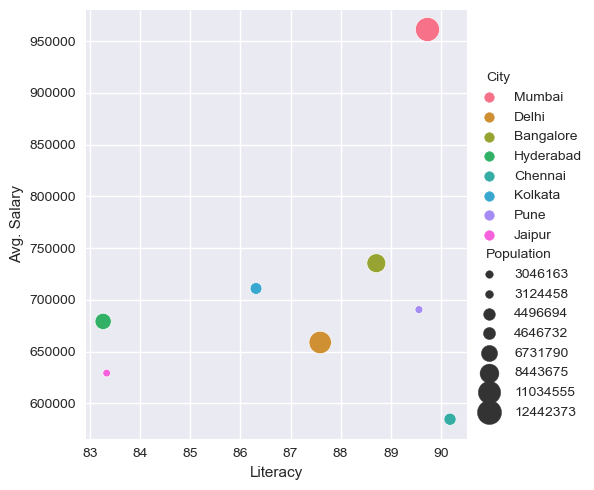

In [163]:
# 3. produce a scatterplot that shows `Literacy` on the x-axis, `Avg. Salary` on the y-axis and the `Population` as the size of the circles. 
#    Try also to add the `City` labels to each circle in the chart
plt.style.use('seaborn-v0_8-darkgrid')
sns.relplot(data=sps_fnd_loc_lit, x='Literacy', y='Avg. Salary', size='Population', hue='City', sizes=(30,300), legend='full')